# 🧹 Breast Cancer Dataset - Preprocessing

In this notebook, we will perform the **initial preprocessing steps** on the Breast Cancer dataset from `sklearn.datasets`.  
The goal is to clean the data, handle missing values/duplicates, format columns properly, and prepare it for further analysis.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer


### 1. Load the Dataset
We use the built-in `load_breast_cancer()` function from scikit-learn.  
This dataset contains features describing cell nuclei in breast cancer biopsies, along with a binary classification (malignant/benign).


In [2]:
# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

### 2. Quick Overview of the Dataset
Let's look at the first few rows, dataset shape, info, and check for missing values or data type issues.


In [3]:
# Display the first 5 rows of the dataset
print(df.head(5))

# Display the shape of the dataset
print(df.shape)

# Show dataset information
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Check column datatypes
print(df.dtypes)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

### 3. Target Class Distribution
We need to understand how balanced the dataset is (malignant vs. benign).


In [4]:
# Check class balance
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

### 4. Meaning of Target Classes
The target values (0 and 1) represent **Malignant** and **Benign** tumors.  
We confirm this using `data.target_names`.


In [5]:
# Check what 0 and 1 represent in the target column
# The variable 'target_names' comes from the 'data' object, which is a Bunch returned by sklearn.datasets.load_breast_cancer().
print(data.target_names)
print("0:", data.target_names[0])
print("1:", data.target_names[1])

['malignant' 'benign']
0: malignant
1: benign


### 5. Visualize Target Class Distribution
We create a bar plot to see the distribution of malignant vs benign cases.


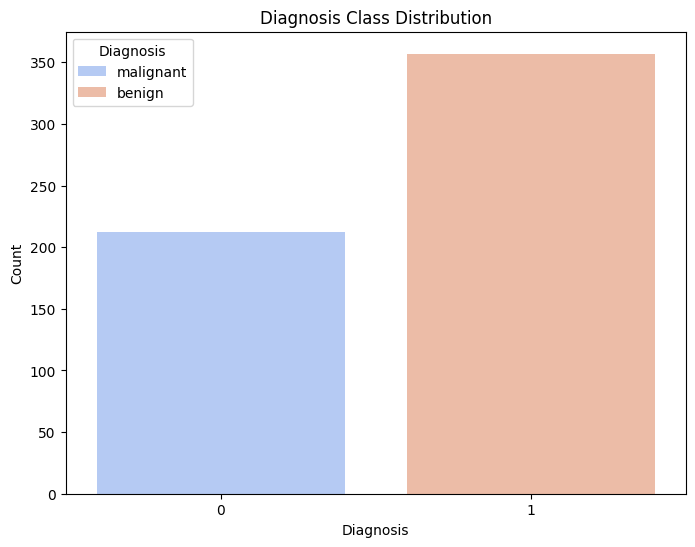

In [6]:
# Add legend with custom labels for target classes
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='target', hue='target', palette='coolwarm')
ax.set_title('Diagnosis Class Distribution')
ax.set_xlabel('Diagnosis')
ax.set_ylabel('Count')
ax.legend(['malignant', 'benign'], title='Diagnosis', loc='upper left')
plt.show()

### 6. Check for Duplicates
Duplicates don’t add new information and should be removed.


In [7]:
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 0


### 7. Format Column Names
We standardize column names by making them lowercase, removing spaces, and replacing them with underscores.


In [8]:
# Format columns
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Ensure target is categorical
df['target'] = df['target'].astype('category')

# Ensure target is categorical


In [9]:
df['target'] = df['target'].astype('category')

✅ **Preprocessing Complete!**  
The dataset is now cleaned, standardized, and ready for **Exploratory Data Analysis (EDA)** and **Modeling**.

In [10]:
df.to_csv('Data/Wisconsin Breast Cancer Dataset_cleaned.csv', index=False)